In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plot
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
df = pd.read_csv('datasets/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
# dictionary to map class to number
class_to_num = {"Class" : {'Setosa': 1, 'Versicolor': 2, 'Virginica': 3}}

# use replace function to map class to number
df.replace(class_to_num, inplace=True)
print(df["Class"].value_counts()) # print the number of data points to check if each class has been changed to a number

Class
1    50
2    50
3    50
Name: count, dtype: int64


/tmp/ipykernel_1974938/2321338927.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(class_to_num, inplace=True)


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [5]:
X=df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y=df[["Class"]]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
DTClassifier = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)

In [8]:
y_pred = DTClassifier.predict(X_test)
print(y_test, "\n", y_pred)
print(len(y_test))
accuracy = accuracy_score(y_test, y_pred)

     Class
73       2
18       1
118      3
78       2
76       2
31       1
64       2
141      3
68       2
82       2
110      3
12       1
36       1
9        1
19       1
56       2
104      3
69       2
55       2
132      3
29       1
127      3
26       1
128      3
131      3
145      3
108      3
143      3
45       1
30       1
22       1
15       1
65       2
11       1
42       1
146      3
51       2
27       1 
 [2 1 3 2 2 1 2 3 2 2 3 1 1 1 1 2 3 2 2 3 1 3 1 3 3 3 3 3 1 1 1 1 2 1 1 3 2
 1]
38


In [9]:
print(accuracy)

1.0


In [10]:
list(y_train.columns)


['Class']

In [11]:
dot_data = export_graphviz(DTClassifier, feature_names=list(X_train.columns), class_names=["Setosa","Versicolor", "Virginica"], 
                           out_file=None, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("assets/DTclassifier.png")

True

![Decision Tree image](assets/DTclassifier.png)

Text(0, 0.5, 'Accuracy')

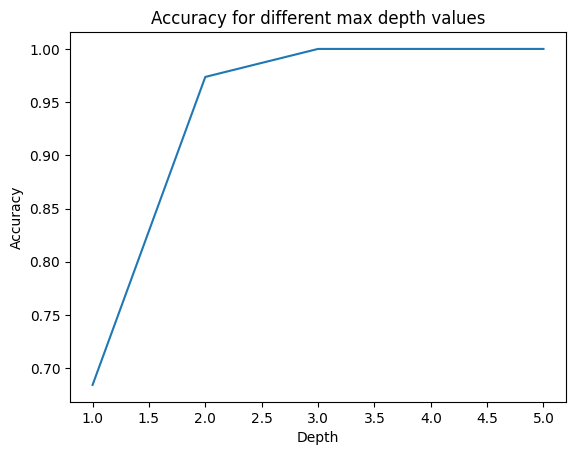

In [12]:
accuracies=[]
depths=[i for i in range(1,6)]

for depth in depths:
    dtc = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    dtc_y_pred = dtc.predict(X_test)
    dtc_accuracy = accuracy_score(y_test, dtc_y_pred)
    accuracies.append(dtc_accuracy)

plot.figure()
plot.plot(depths, accuracies)
plot.title("Accuracy for different max depth values")
plot.xlabel("Depth")
plot.ylabel("Accuracy")